<a href="https://colab.research.google.com/github/Daniel-ASG/3_IMERSAO_DE_DADOS_ALURA/blob/main/Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#1 ANÁLISE DE DADOS, PYTHON, PANDAS E NOVOS FÁRMACOS

Seja bem-vindo e bem-vinda à primeira aula da Imersão Dados 3ª Edição!

Este é o notebook da aula 01, nesta aula vamos realizar nossa primeira análise de dados e no final já seremos capazes de tirar algumas conclusões.

[1ª aula](https://www.alura.com.br/imersao-dados/aula01-python-pandas-farmacologia?utm_campaign=imersao_dados_3_aulas_aula_1&utm_medium=email&utm_source=RD+Station)

Esse projeto foi inspirado em um desafio do [Laboratory innovation science at Harvard](https://lish.harvard.edu/) disponibilizando os dados em uma competição no [Kaggle](https://www.kaggle.com/c/lish-moa).


## Importação das bibliotecas que serão utilizadas neste notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Importando os dados

Nessa imersão nós vamos mergulhar no universo da biologia e da biotecnologia e explorar uma base de dados da área.

Para a nossa análise, foi usada uma base de dados hospedada no Github, a qual pode ser enocntrada no link:

https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true


In [2]:
dados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression = 'zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Com a visualização do Dataframe é possível notar que temos dados referentes a ID, tratamento, tempo, dose, entre outras.

Para termos informação do total de linhas e colunas basta utilizar:

In [3]:
dados.shape

(23814, 877)

## Realizando a análise dos dados

In [4]:
dados.dtypes

id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c-95          float64
c-96          float64
c-97          float64
c-98          float64
c-99          float64
Length: 877, dtype: object

In [5]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
tempo,23814.0,48.020156,19.402807,24.000,24.000000,48.00000,72.000000,72.000
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
...,...,...,...,...,...,...,...,...
c-95,23814.0,-0.353726,1.629291,-10.000,-0.567975,-0.01025,0.444750,2.814
c-96,23814.0,-0.463485,2.059725,-10.000,-0.552575,-0.00125,0.465225,3.505
c-97,23814.0,-0.378241,1.703615,-10.000,-0.561000,-0.00680,0.446400,2.924
c-98,23814.0,-0.470252,1.834828,-10.000,-0.592600,0.01400,0.461275,3.111


Vamos criar uma função para mostrar algumas características básicas das variáveis:

In [70]:
def analise(var):
    n = 10
    tamanho = len(dados[var].unique())
    expressao = f'Temos o total de {tamanho} dados diferentes na variável "{var}".'
    print(expressao if tamanho>n else '')


    print(f'\nOs {tamanho if tamanho<n else n}', end=' ')
    print('únicos' if tamanho<n else 'maiores', end=' ')
    print(f'diferentes tipos de dados da variável "{var}":')
    if (tamanho<n):
        print(dados[var].value_counts())
    else:
        print(dados[var].value_counts()[:n])

    print(f'\nO percentual dos {tamanho if tamanho<n else n}', end=' ')
    print('únicos' if tamanho<n else 'maiores', end=' ')
    print(f'diferentes tipos de dados da variável "{var}":')
    
    if (tamanho<n):
        print((dados[var].value_counts(normalize=True)*100).round(2))
        plt.figure(figsize=(10,6))
    else:
        print((dados[var].value_counts(normalize=True)*100)[:n].round(2))
        plt.figure(figsize=(15,6))
    ax = dados[var].value_counts()[:n].sort_values(ascending=False).plot.bar(rot=0, color='c')
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_xlabel(var, fontsize=14);

Vamos fazer uma análise dos dados que estamos tratando. Começaremos selecionando só uma coluna, para entendermos do que ela está tratando. 

Vamos iniciar com a coluna tratamento.

Digite a variável a ser analisada: tratamento


Os 2 únicos diferentes tipos de dados da variável "tratamento":
com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

O percentual dos 2 únicos diferentes tipos de dados da variável "tratamento":
com_droga       92.16
com_controle     7.84
Name: tratamento, dtype: float64


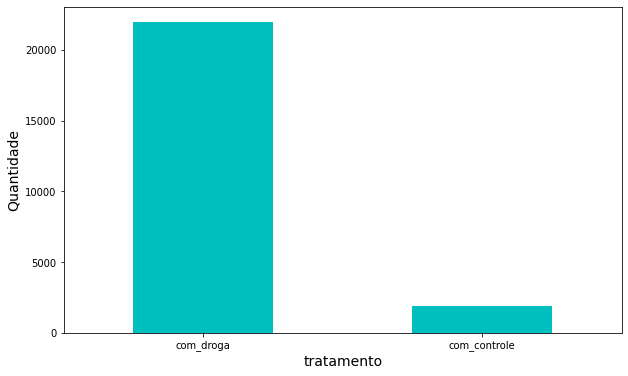

In [66]:
var = str(input('Digite a variável a ser analisada: '))
analise(var)

Observe que encontramos dois tipos: 'com droga' e 'com controle'.

Com droga, como o próprio nome nos diz, é quando estamos aplicando algum tipo de droga para a amostra. Já com o controle é uma técnica estatística em que isolamos as outras varíaveis e observamos apenas a variável de interesse.


Agora vamos analisar a coluna do tempo:

Digite a variável a ser analisada: tempo

Os 3 únicos diferentes tipos de dados da variável "tempo":
48    8250
72    7792
24    7772
Name: tempo, dtype: int64

O percentual dos 3 únicos diferentes tipos de dados da variável "tempo":
48    34.64
72    32.72
24    32.64
Name: tempo, dtype: float64


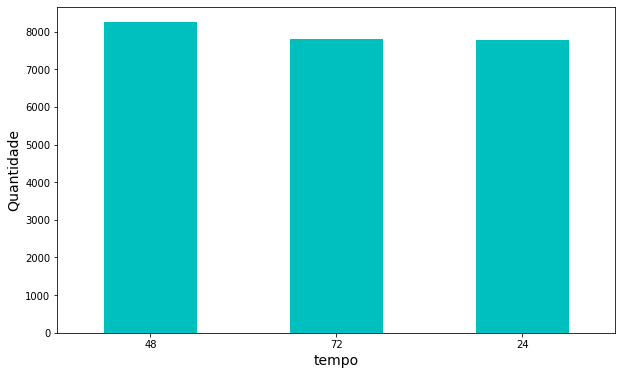

In [54]:
var = str(input('Digite a variável a ser analisada: '))
analise(var)

Encontramos 3 tipos de informação nessa coluna: 24, 72 e 48. O que pode nos indicar o tempo, provavelmente em horas, de intervalo que foi administrada a dose de medicamentos ou drogas.

É interessante que observamos o comportamento das células com essa diferença de tempo, já que se analisássemos num período diferente poderia não dar tempo suficiente pra célula manifestar o comportamento devido.

Além do tempo, podemos analisar também a coluna de dose:

Digite a variável a ser analisada: dose

Os 2 únicos diferentes tipos de dados da variável "dose":
D1    12147
D2    11667
Name: dose, dtype: int64

O percentual dos 2 únicos diferentes tipos de dados da variável "dose":
D1    51.01
D2    48.99
Name: dose, dtype: float64


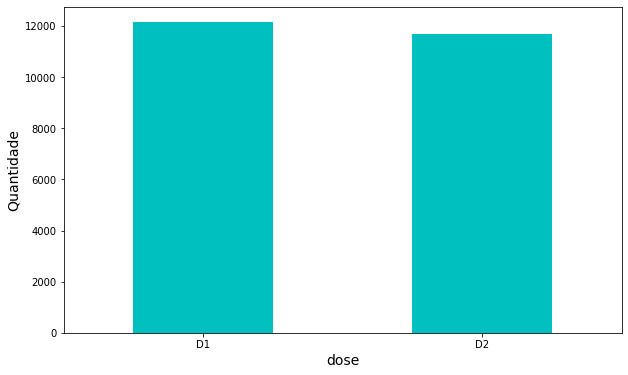

In [55]:
var = str(input('Digite a variável a ser analisada: '))
analise(var)

Vamos analisar a categoria droga:

Digite a variável a ser analisada: droga
Temos o total de 3289 dados diferentes na variável "droga".

Os 10 maiores diferentes tipos de dados da variável "droga":
cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
Name: droga, dtype: int64

O percentual dos 10 maiores diferentes tipos de dados da variável "droga":
cacb2b860    7.84
87d714366    3.02
9f80f3f77    1.03
8b87a7a83    0.85
5628cb3ee    0.85
d08af5d4b    0.82
292ab2c28    0.81
d50f18348    0.78
d1b47f29d    0.75
67c879e79    0.08
Name: droga, dtype: float64


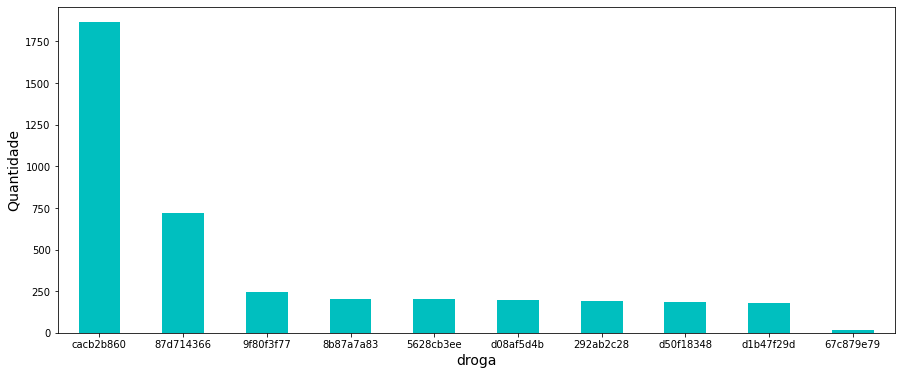

In [65]:
var = str(input('Digite a variável a ser analisada: '))
analise(var)

Agora com a resposta de ```dados['droga']``` obtivemos essa série de códigos como resposta. Talvez esses números foram codificados na tentativa manter anônimos os tipos de drogas usadas, para tentar evitar qualquer tipo de viés na análise dos resultados.

Há uma série de regras quando alguns experimentos são feitos, evitando mostrar dados como nome, sexo, e outros fatores, dependendo da análise a ser feita, para que sejam evitados vieses.

Vamos analisar a coluna nomeada como g-0 agora:

Digite a variável a ser analisada: g-0
Temos o total de 14367 dados diferentes na variável "g-0".

Os 10 maiores diferentes tipos de dados da variável "g-0":
 0.0000     22
-0.3372     15
 10.0000    14
Name: g-0, dtype: int64

O percentual dos 10 maiores diferentes tipos de dados da variável "g-0":
 0.0000     0.09
-0.3372     0.06
 10.0000    0.06
Name: g-0, dtype: float64


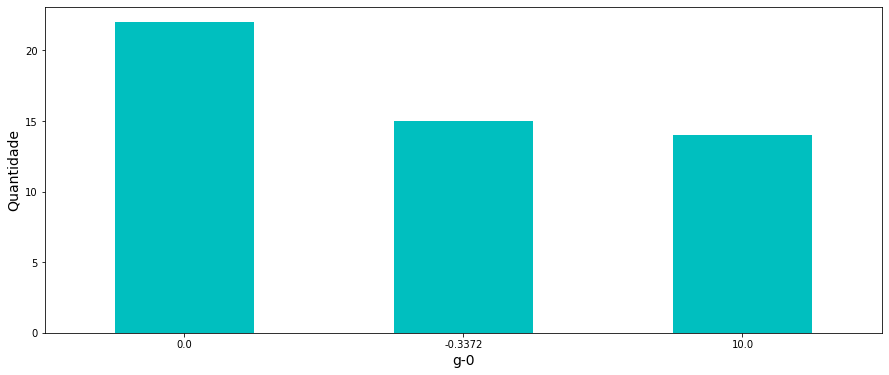

In [67]:
var = str(input('Digite a variável a ser analisada: '))
analise(var)

In [ ]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

Só olhando fica difícil tentar deduzir o que esses números representam. Então, nesse ponto, com o auxílio da [Vanessa](https://www.linkedin.com/in/vanessa-leiko-oikawa-cardoso/), especialista, conseguimos a informação que essa letra 'g' da coluna remete à palavra gene. Ou seja, esses números nos dizem a expressão de cada gene frente as drogas ou a exposição.

Quando observamos na tabela, percebemos que há diversos valores, inclusive com várias casas decimais. Aparentemente esses números foram "arredondados", normalizados, para podermos compará-los de alguma forma.

Então, até agora na nossa análise, já conseguimos identificar e entender as informações de diferentes colunas; as colunas que nos indicam os tratamentos, as drogas, o tempo, e depois as respostas genéticas, que tem a letra g no ínicio do seu nome.

Outro tipo de análise que podemos fazer agora é entender a distribuição dessas informações. Por exemplo, podemos saber quantos experimentos temos utilizando droga e quantos não utilizam; quantos usam o d1, e quantos utilizam o d2, e assim por diante.

Como podemos fazer isso? Vamos utilizar esse código:

In [ ]:
dados.tratamento.value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

Agora, em vez de usarmos o ```.unique``` no código, nós utilizamos o ```.value_counts``` já que nosso objetivo era contar a quantidade de valores que apareciam nas colunas, nesse caso, na coluna ```tratamento```.

No resultado ele retornou 2 linhas: uma com a quantidade de elementos na categoria ```com_droga``` e a outra com a quantidade que temos na categoria ```com_controle```.

Será que essa diferença entre os valores dentro das categorias continuam tão desproporcionais? Vamos investigar a categoria ```dose```:

In [ ]:
dados.dose.value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

Para entendermos melhor e fazer um comparativo é legal traçarmos a proporção entre os dados. Vamos escrever o código agora, setando como parâmetro, dentro dos parênteses o ```normalize = True``` :

In [ ]:
dados.tratamento.value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Temos agora os dados **normalizados**. Podemos interpretar utilizando a porcentagem (multiplicando por 100), o que nos daria algo em torno de 92% versus 8% (aproximadamente), mostrando o tamanho da desproporção.

Vamos fazer o mesmo agora com a coluna ```dose```:

In [ ]:
dados.dose.value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

Vamos apresentar esses resultados acima de maneira gráfica:

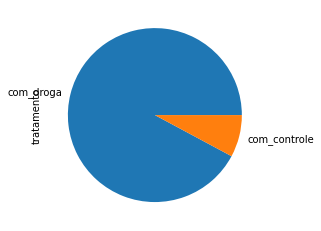

In [ ]:
dados.tratamento.value_counts().plot.pie();

Aqui, em azul, nós temos a quantidade de tratamento com drogas(que é muito maior, em proporção), e em laranja temos o tratamento "com controle". 

Vamos aproveitar e analisar as outras informações com os gráficos também, para vermos o que acontece. Vamos analisar a coluna tempo:

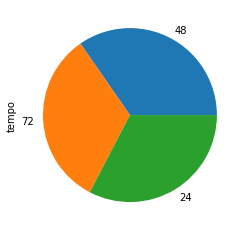

In [ ]:
dados.tempo.value_counts().plot.pie();

Repare como ficou difícil a olho nu identificarmos qual observação é maior através do gráfico. Esse tipo de gráfico pode acabar dificultando um pouco a análise, especialmente quando as informações estão melhor balanceadas. 

Apesar de podermos identificar a quantidade de horas observadas, nós não conseguimos extrair mais nenhuma informação desse gráfico. Inclusive, nós temos uma espécie de regrinha, que diz que quando formos fazer algum tipo de análise, procurarmos evitar o uso de gráficos que nos remetem a comida, como por exemplo: rosca, pizza, torta, e assim por diante.

Então qual tipo de gráfico poderíamos utlizar para melhorarmos nossa visualização? Vamos utilizar o gráfico de barras:

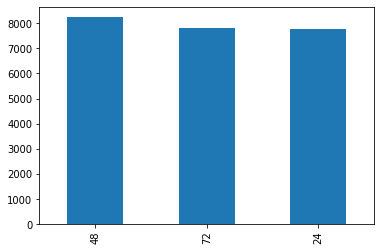

In [ ]:
dados.tempo.value_counts().plot.bar();

In [ ]:
dados.tempo.value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

Agora sim conseguimos identificar com mais facilidade qual observação tem a sua maior frequência. Na verdade a quantidade de horas com o maior número de observações foi a de 48.

No eixo y temos o número que nos remete ao número de observações. Então podemos observar que tivemos pouco mais de 8000 observações relativas às 48 horas.


Ao longo da aula nós falamos sobre a expressão gênica. Se nós voltarmos à tabela, na coluna g-0, nós temos alguns valores dentro de um intervalo definido. Para não termos valores muito distantes entre si, é bastante comum no meio científico que haja uma normalização dos resultados, de forma que criemos um intervalo que não seja tão grande e que o meio dessa distribuição seja o 0.

Como nós podemos saber em quais linhas dessa coluna o meu valor está acima de 0?

Vamos fazer uma consulta nos nossos dados, da seguinte maneira:

In [ ]:
dados_filtrados = dados[dados['g-0'] > 0]
dados_filtrados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.55

Dessa maneira, salvamos um novo dataframe com o valores maiores do que 0 na coluna g-0, com a ajuda dessa máscara com o código ```[dados['g-0']>0]```.

Dessa mesma forma que aplicamos essa máscara, podemos utilizar o mesmo caminho, ou outras 'querys', para responder várias outras perguntas.

-----------
# Desafios

###Desafio 01: Investigar por que a classe tratamento é tão desbalanceada?

Isto provavelmente se deve ao fato de que o controle é apenas 1 enquanto o experimento é replicado para testar várias drogas diferentes (3289 tipos diferentes de drogas <- Desafio 4)

###Desafio 02: Plotar as 5 últimas linhas da tabela

In [ ]:
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520



###Desafio 03: Proporção das classes tratamento.

In [ ]:
dados.tratamento.value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

###Desafio 04: Quantas tipos de drogas foram investigados.

In [ ]:
len(dados.droga.unique())

3289

###Desafio 05: Procurar na documentação o método query (pandas).

A documentação do método ```query``` pode ser encontrada neste [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

###Desafio 06: Renomear as colunas tirando o hífen. 

Para resolver este desafio foi usado o método [```pandas.Series.str.replace```](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) do Pandas

In [ ]:
dados.columns = dados.columns.str.replace('-', '_')
dados.head()

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_60,c_61,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


###Desafio 07: Deixar os gráficos bonitões. (Matplotlib.pyplot)

#### Refazendo o primeiro gráfico

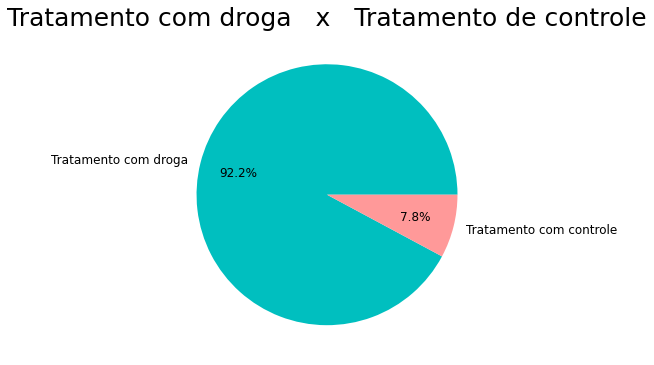

In [ ]:
plt.title('Tratamento com droga   x   Tratamento de controle', fontsize=25)

ax = dados.tratamento.value_counts().plot.pie(figsize=(6,6),
                                         colors=['c','#ff9999'],
                                         autopct='%1.1f%%',
                                         pctdistance=0.7,
                                         labels=['Tratamento com droga', 'Tratamento com controle'], 
                                         fontsize=12)
ax.set_ylabel('');

#### Refazendo o segundo gráfico

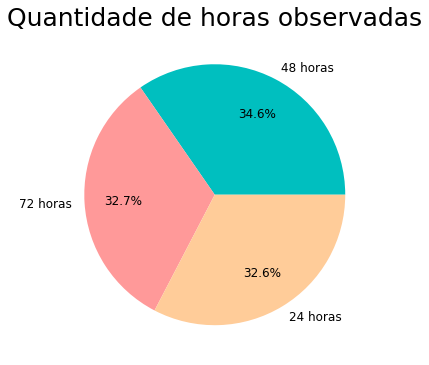

In [ ]:
plt.title('Quantidade de horas observadas', fontsize=25)

ax = dados.tempo.value_counts().plot.pie(figsize=(6,6),
                                         colors=['c','#ff9999','#ffcc99'],
                                         autopct='%1.1f%%',
                                         pctdistance=0.7,
                                         labels=['48 horas', '72 horas', '24 horas'], 
                                         fontsize=12)
ax.set_ylabel('');

#### Refazendo o terceiro gráfico

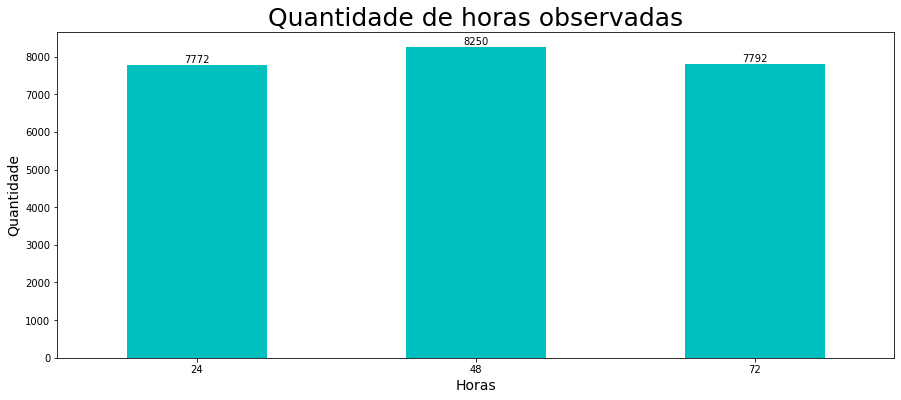

In [ ]:
plt.figure(figsize=(15,6))
ax = dados.tempo.value_counts().sort_index().plot.bar(rot=0, color='c')
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 6),
                textcoords = 'offset points')
ax.set_title('Quantidade de horas observadas', fontsize=25)
ax.set_ylabel('Quantidade', fontsize=14)
ax.set_xlabel('Horas', fontsize=14);

In [ ]:
dados.tempo.value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64


###Desafio 08: Resumo do que você aprendeu com os dados